# Lesson Overview
> - Encodings like shape, color and size
> - Faceting 
> - Adapted Visualizations
> - Plot matrices
> - Feature engineering

## Color Palettes
![](images/2.png)

In [ ]:
# Encoding via color
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

# or using matplotlib
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3')
plt.colorbar()

# color palette
sb.palplot(sb.color_palette('viridis', 9))  # sequential
sb.palplot(sb.color_palette('vlag', 9))  # diverging

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

%matplotlib inline

In [2]:
pokemon = pd.read_csv('data/pokemon.csv')

In [3]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Encoding Exercise

In [23]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


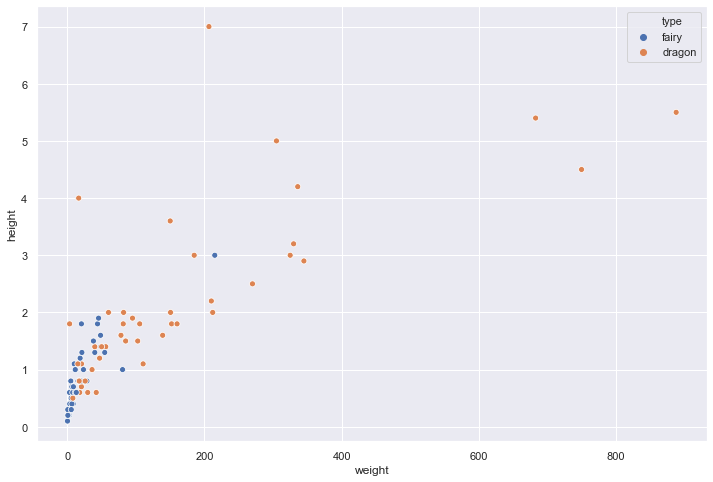

In [70]:
df = pkmn_types[(pkmn_types['type']=='fairy') | (pkmn_types['type']=='dragon')]
plt.figure(figsize=[12,8])
sns.scatterplot(data=df, x='weight', y='height', hue='type')

> Here I made use of **log transform** to adjust the weight

In [ ]:
g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'num_var1', 'num_var2')

In [ ]:
df = 

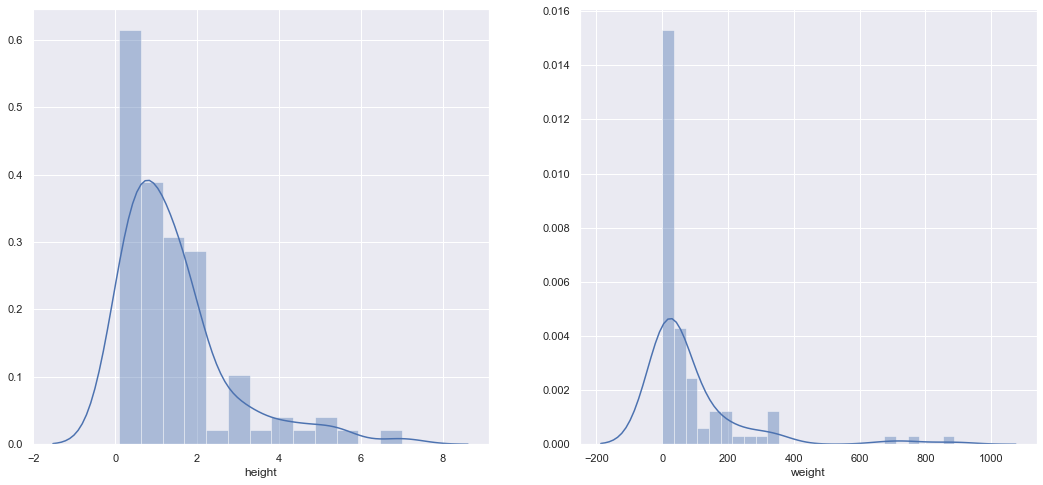

In [58]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
sns.distplot(df['height'])

plt.subplot(1,2,2)
sns.distplot(df['weight'])

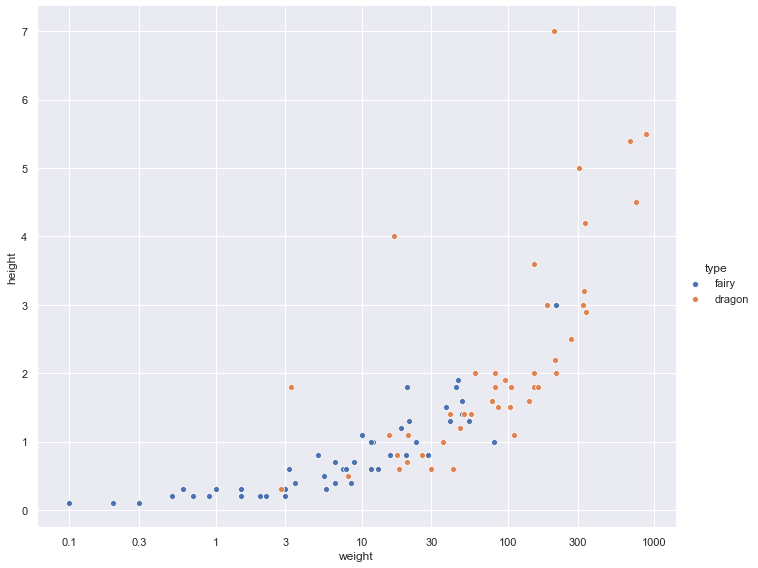

In [69]:
g = sns.FacetGrid(data=df, hue='type', height=8, aspect=1.2)
g.map(sns.scatterplot,'weight', 'height')
g.set(xscale='log')
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

## Faceting in Two Directions
 
**Task 1:** Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [122]:
df = pd.read_csv('data/fuel_econ.csv')
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


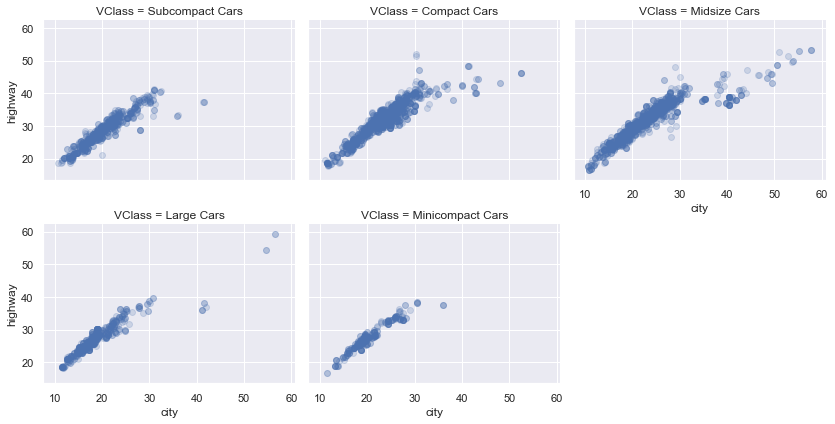

In [84]:
g = sns.FacetGrid(data=df, col='VClass', size=3, col_wrap=3, height=5, aspect=1.3)
g.map(plt.scatter, 'city', 'highway', alpha=1/5)

**Task 2:** Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [87]:
df_f = df[(df['fuelType']=='Premium Gasoline') | (df['fuelType']=='Regular Gasoline')]
df_f['fuelType'].nunique()

2

In [99]:
# ordering for ordinal data
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
df_f['VClass'] = df_f['VClass'].astype(ordered_cat)

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


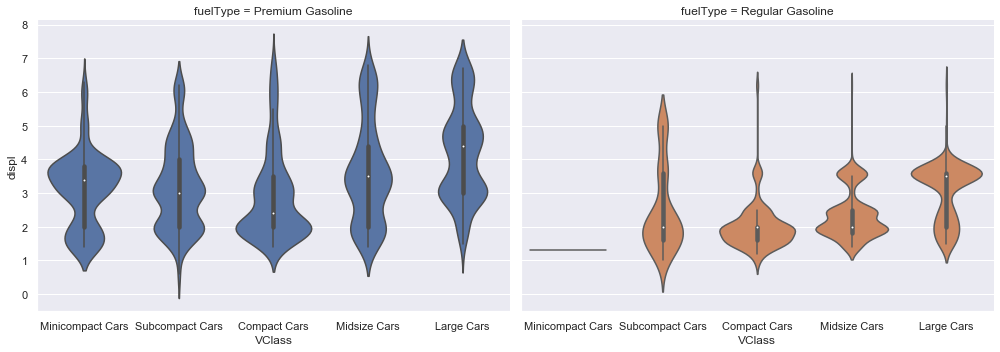

In [100]:
g = sns.FacetGrid(df_f, col='fuelType', size=5, height=5, aspect=1.4, hue='fuelType')
g.map(sns.violinplot, 'VClass', 'displ')

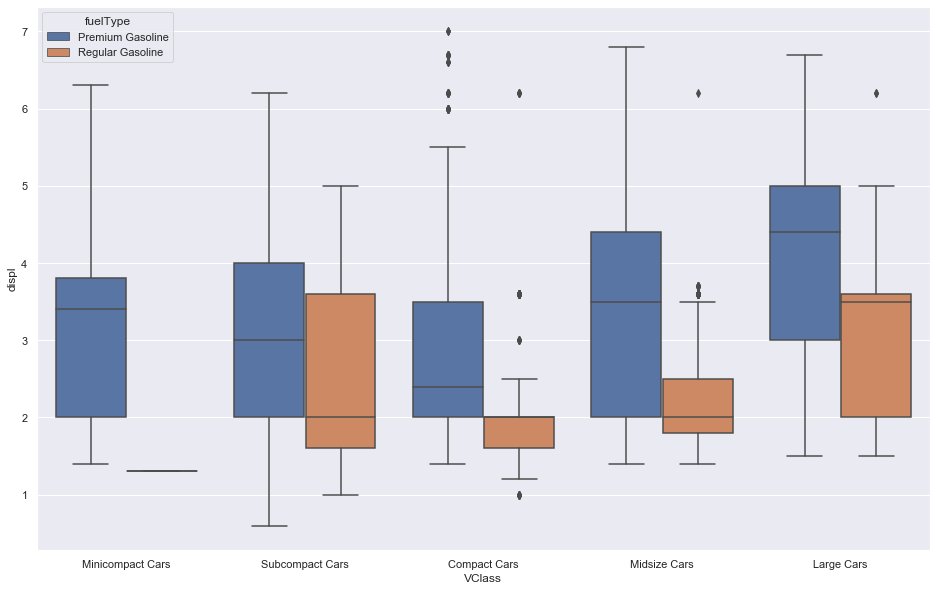

In [101]:
plt.figure(figsize=[16,10])
sns.boxplot(data=df_f, x='VClass', y='displ', hue='fuelType')

## Plot Matrices

![](images/3.png)

> - Initial exploration of data
> - Follow up with specific plots to further investigate the relationship between variables
> - **Heatmaps** can also be used, for correlation exploration

**Task 1:** Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

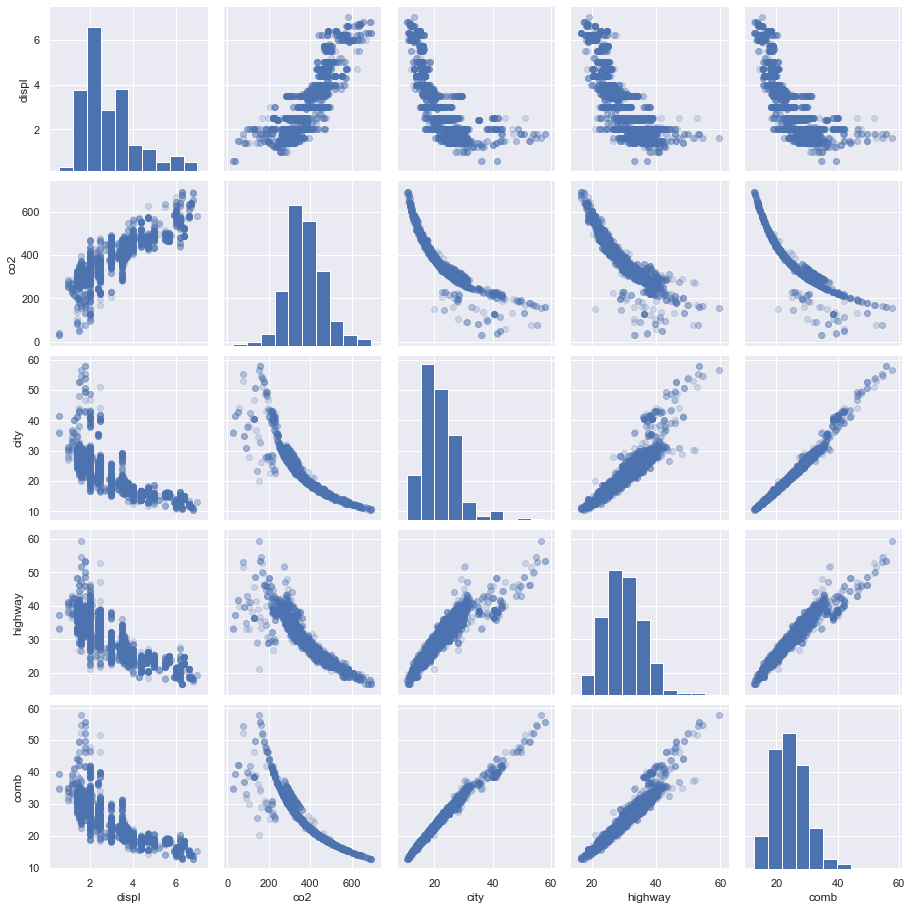

In [104]:
#sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

g = sns.PairGrid(data=df, vars = ['displ', 'co2', 'city', 'highway', 'comb'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=1/5)

## Feature Engineering
> - Create new variables as function of existing variables in data 
> - Another way that you can perform feature engineering is to use the cut function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. 

**Task 2:** The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, **compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.**

In [123]:
filter_list = ['Premium Gasoline', 'Diesel', 'Regular Gasoline']
df['co2_rate'] = df['co2'] * df['comb']
df_f2 = df[df.fuelType.isin(filter_list)]
df_f2['fuelType'].nunique()

3

In [125]:
df_f2.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,co2_rate
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,8826.0219
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,8802.7223


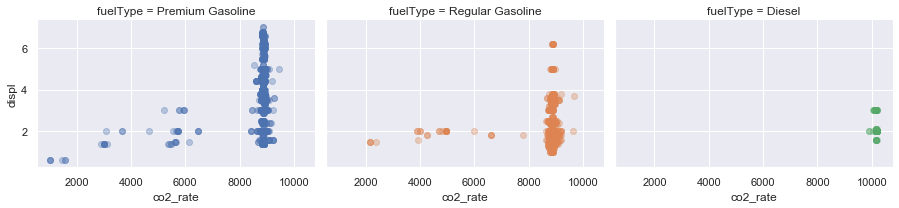

In [137]:
g = sns.FacetGrid(data=df_f2, col='fuelType', size=3, height=5, aspect=1.4, hue='fuelType')
g.map(plt.scatter, 'co2_rate', 'displ', alpha=1/3)